# Writing code from scratch for implementing CNN using python and numpy for 2D input . But I have to modify all my code to do bathch gradient descent .

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def padding_1d(x,layer):
  z = np.array([0])
  z = np.repeat(z, layer)
  return np.concatenate([z, x, z])

In [ ]:
def padding(x,layer):
  outs = [padding_1d(row,layer) for row in x]
  return np.array(outs)

In [ ]:
inp = np.array([[1,2,3,4,5], [6,7,8,9,10]])
out = padding(inp, 1)
print(out.shape)
print(out.shape[0])
print(out.shape[1])

(2, 7)
2
7


In [ ]:
print(out)

[[ 0  1  2  3  4  5  0]
 [ 0  6  7  8  9 10  0]]


### Convolution layer

In [ ]:
# def convulation(input,filter,padding_layer=0,stride=1):
#   pad_input = padding(input,padding_layer)
#   output_height = int(((input.shape[0] - filter.shape[0] + (2*padding_layer))/stride) + 1)
#   output_weidth= int(((input.shape[1] - filter.shape[1] + (2*padding_layer))/stride) + 1)

#   output = np.zeros((output_height, output_weidth))

#   out_h = 0
#   for i in range(0,pad_input.shape[0]-filter.shape[0] + 1, stride):
#     out_w = 0
#     for j in range(0,pad_input.shape[1]-filter.shape[1] + 1, stride):
#       for f_h in range(filter.shape[0]):
#         for f_w in range(filter.shape[1]):
#           output[out_h][out_w] += filter[f_h][f_w] * pad_input[i+f_h][j+f_w]
#       out_w += 1
#     out_h += 1

#   return output



In [ ]:
# input = np.array([[0,0,0,0,0], [0,1,2,3,0], [0,4,5,6,0], [0,7,8,9,0], [0,0,0,0,0]])
# filter = np.array([[0,1], [2,3]])
# filter_2 = np.array([[1,3,-1], [0,2,2], [0,-1,-2]])

# output = convulation(input,filter,0,1)
# output

In [ ]:
# import numpy as np

# def pad_2d_array(x, pad_size):
#     """
#     Pad a 2D numpy array 'x' with zeros.

#     Parameters:
#     x (numpy.ndarray): Input 2D array.
#     pad_size (int): Number of rows/columns to pad on each side.

#     Returns:
#     numpy.ndarray: Padded 2D array.
#     """
#     return np.pad(x, pad_size, mode='constant')

# # Example usage:
# x = np.array([[1, 2, 3],
#               [4, 5, 6],
#               [7, 8, 9]])

# padded_x = pad_2d_array(x, 2)
# print(padded_x)


[[0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 1 2 3 0 0]
 [0 0 4 5 6 0 0]
 [0 0 7 8 9 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0]]


In [ ]:
class Convoluation_0:

  def __init__(self,filter_size:tuple=(2,2),padding_layer:int=0,stride:int=1):
    self.filter = np.random.randn(filter_size[0],filter_size[1])
    self.bias = np.random.randn()
    self.padding_layer = padding_layer
    self.stride = stride


  def padding(self,x, pad_size):
    """
    Pad a 2D numpy array 'x' with zeros.

    Parameters:
    x (numpy.ndarray): Input 2D array.
    pad_size (int): Number of rows/columns to pad on each side.

    Returns:
    numpy.ndarray: Padded 2D array.
    """
    return np.pad(x, pad_size, mode='constant')


  def forward(self, input:np.ndarray) -> np.ndarray:
    """
    this function will do convoluation operation on input array with filter
    and will also add bias after it .

    Args : input array (image)
    """
    self.input = input
    # if we want to do padding around input
    self.pad_input = padding(self.input,self.padding_layer)
    # height of the output array . calculate by formula
    output_height = int(((self.input.shape[0] - self.filter.shape[0] + (2*self.padding_layer))/self.stride) + 1)
    # width of the output array
    output_weidth= int(((self.input.shape[1] - self.filter.shape[1] + (2*self.padding_layer))/self.stride) + 1)

    # take a array of shape (output_height, output_width) with all element zero
    self.output = np.zeros((output_height, output_weidth))

    # for putting element in each row of output array
    out_h = 0
    # looping through the pad_input array in row .
    for i in range(0,self.pad_input.shape[0]-self.filter.shape[0] + 1, self.stride):
      # for putting element in column in output array
      out_w = 0
      # looping through the pad_input column .
      for j in range(0,self.pad_input.shape[1]-self.filter.shape[1] + 1, self.stride):

        # looping through the all row and column of the filter . row wise
        for f_h in range(self.filter.shape[0]):
          for f_w in range(self.filter.shape[1]):
            # putting element in output array after convoluation(X*w)
            self.output[out_h][out_w] += self.filter[f_h][f_w] * self.pad_input[i+f_h][j+f_w]
        out_w += 1
      out_h += 1

    self.output += self.bias



  def backward(self, prev_grad:np.ndarray):
    """
    this backward function will calculate the gradient of loss w.r.t weight and bias.

    Args :
          prev_grad : it is the gradient of loss w.r.t next layer . It will use in
                       calculating gradient of loss wr.t weight and bias.

    """
    # first try to find out the gradient of loss w.r.t bias

    # gradient of loss w.r.t bias will be simply summation of
    # all element of prev_grad (derive from calculation)
    self.grad_bias = np.sum(prev_grad, dtype=np.float32)

    # Now try to find out gradient of loss w.r.t weight
    # it will be convolutation operation of padded input array and prev_grad array

    self.grad_weight = np.zeros(self.filter.shape)

    row_grad = 0         # for looping through all the row of prev_grad
    # loop through all the row of input array
    for i in range(0, self.pad_input.shape[0]-prev_grad.shape[0] + 1, self.stride):
      col_grad = 0       # for looping through all the column of prev_grad
      # loop through all the column of padded input array
      for j in range(0, self.pad_input.shape[1]-prev_grad.shape[1] + 1, self.stride):
        # looping through the all row and column of the prev_grad . row wise
        for f_h in range(prev_grad.shape[0]):
          for f_w in range(prev_grad.shape[1]):
            # putting element in grad_weight array after convoluation(input,prev_grad))
            self.grad_weight[row_grad][col_grad] += prev_grad[f_h][f_w] * self.pad_input[i+f_h][j+f_w]
        col_grad += 1
      row_grad += 1


    # finding gradient of loss w.r.t input . It is simply full convolution operation of
    # prev_grad and 180 deg rotted filter . To do full convolution we will do padding of size (filter-1) around prev_grad

    self.grad_input = np.zeros(self.pad_input.shape)

    # padding around the prev_grad so that we can do full convolution .
    pad_prev_grad = padding(prev_grad,self.filter.shape[0]-1)

    # Rotate the filter by 180 degrees for convolution
    rotated_filter = np.rot90(self.filter, 2)


    # Now we will do convolution operation of pad_prev_grad and filter .
    row_grad = 0         # for looping through all the row of prev_grad
    # loop through all the row of pad_prev_grad array
    for i in range(0, pad_prev_grad.shape[0]-self.filter.shape[0] + 1, 1):
      col_grad = 0       # for looping through all the column of prev_grad
      # loop through all the column of padded input array
      for j in range(0, pad_prev_grad.shape[1]-self.filter.shape[1] + 1, 1):
        # looping through the all row and column of the prev_grad . row wise
        for f_h in range(self.filter.shape[0]):
          for f_w in range(self.filter.shape[1]):
            # putting element in grad_weight array after convoluation(input,prev_grad))
            self.grad_input[row_grad][col_grad] += rotated_filter[f_h][f_w] * pad_prev_grad[i+f_h][j+f_w]
        col_grad += 1
      row_grad += 1




  def update(self, learning_rate):
    """
    this will take learning rate as parameter and will update the weight and bias of the filter and layer
    """
    self.filter -= learning_rate * self.grad_weight
    self.bias -= learning_rate * self.grad_bias


In [ ]:
input = np.random.randn(28,28)

# filter = np.random.randn(4,4)
# filter_2 = np.array([[1,3,-1], [0,2,2], [0,-1,-2]])


conv1 = Convoluation_0((4,4),3,2)
conv1.forward(input)
print(conv1.output.shape)

# pre_grad = np.array([[0.5,0.4], [1.11,-1.03]])

# grad = conv1.backward(pre_grad)
# print(grad)

(16, 16)


### Relu activation layer

In [ ]:
def relu(x):
  return np.maximum(x,0)

In [ ]:
x = np.array([[1,-1,2], [0, -3 , 4]])
x = relu(x)
x

array([[1, 0, 2],
       [0, 0, 4]])

In [ ]:
def sigmoid(x):
  return (1/(1+np.exp(-x)))

In [ ]:
x = sigmoid(x)
x

array([[0.73105858, 0.5       , 0.88079708],
       [0.5       , 0.5       , 0.98201379]])

In [ ]:
class Activation_ReLU:
  def forward(self, inputs:np.ndarray) -> np.ndarray:
    """
    after multiplying weight with previous layer output and adding bias , we will pass the
    result through relu activation layer . If value is greater than 0 it will be same
    otherwise it will be zero .

    Args :
          output numpy array after dot product and bias addition


    """
    self.output = np.maximum(0, inputs)


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
    Calculate the gradient of loss w.r.t the ReLU activation layer.

    Args:
        prev_grad: Numpy array of the gradient of loss w.r.t the outputs from the previous layer.

    Return:
        Numpy array containing the gradient of loss w.r.t the inputs to the ReLU activation layer.
    """
    self.grad = np.where(self.output > 0, prev_grad, 0)

### Maxpool layer

In [ ]:
def maxpool(x,size=1):
  height_x = x.shape[0]
  width_x = x.shape[1]

  if(height_x%size != 0 or width_x%size != 0):
    return ("size of pooling layer is not compatable with size of x")

  output = np.zeros(shape=(height_x//size, width_x//size))

  out_h = 0
  for i in range(0, height_x, size):
    out_w = 0
    for j in range(0, width_x, size):
      # getting maximum number from the window of size*size
      max_num = float('-inf')
      for k in range(size):
        for l in range(size):
            if x[i+k][j+l] > max_num:
                max_num = x[i+k][j+l]

      # putting the maximum number that we get from window into output matrix
      output[out_h][out_w] = max_num
      out_w+=1
    out_h+=1

  return output




In [ ]:
x = np.array([[7,3,5,2], [8,7,1,6], [4,9,3,9], [0,8,4,5]])
max_poop = maxpool(x,2)
max_poop

array([[8., 6.],
       [9., 9.]])

In [ ]:
class Maxpool:

  def __init__(self,size_of_window:int=1):
    self.size_of_window = size_of_window


  def forward(self,input:np.ndarray) -> np.ndarray:
    """
    This forward layer will take maximum from the feature in window of size = size_of_window .

    Args:
         input : numpy input array that we have to pass to maxpool layer

    """
    self.input = input

    # calculating the height and width of the input matrix
    height_input = self.input.shape[0]
    width_input = self.input.shape[1]

    # if the size_of_window is not compatiable with the height and width of input matrix
    # then return .
    if(height_input%self.size_of_window != 0 or width_input%self.size_of_window != 0):
      return ("size of pooling layer is not compatable with size of x")

    # defining a output zeros matrix with size height_input//size_of_window , width_input//size_of_window
    self.output = np.zeros(shape=(height_input//self.size_of_window, width_input//self.size_of_window))

    # take a index at 0 for row of output matrix
    out_h = 0
    # looping through the row of input matrix by step = size of window
    for i in range(0, height_input, self.size_of_window):
      # take a index of width = 0 for column of output matrix
      out_w = 0
      # looping through the every column for each row of input matrix with step = size of window
      for j in range(0, width_input, self.size_of_window):
        # getting maximum number from the window of size*size from the input matrix
        max_num = float('-inf')
        for k in range(self.size_of_window):
          for l in range(self.size_of_window):
              if self.input[i+k][j+l] > max_num:
                  max_num = self.input[i+k][j+l]

        # putting the maximum number that we get from window into output matrix
        self.output[out_h][out_w] = max_num
        # incrementing the column of output matrix by 1 so that we can put next element there
        out_w+=1
      # incrementing the row of output matrix after going through every column for previous row
      out_h+=1


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
      this function will calculate backward propogation for maxpool layer.
      this function will give output such that it will put prev_grad at maximum
      in window and zero else where for every window.

      Args :
            prev_grad : gradient of the prev layer

    """
    # take a numpy array of size input.shape with all zeros .
    self.grad = np.zeros(self.input.shape)

      # calculating the height and width of the input matrix
    height_input = self.input.shape[0]
    width_input = self.input.shape[1]

    # take a index at 0 for row of prev_grad matrix
    out_h = 0
    # looping through the row of input matrix by step = size of window
    for i in range(0, height_input, self.size_of_window):
      # take a index of width = 0 for column of output matrix
      out_w = 0
      # looping through the every column for each row of input matrix with step = size of window
      for j in range(0, width_input, self.size_of_window):
        # getting maximum number from the window of size*size from the input matrix
        max_num = float('-inf')
        max_x = 0
        max_y = 0
        for k in range(self.size_of_window):
          for l in range(self.size_of_window):
              if self.input[i+k][j+l] > max_num:
                  max_num = self.input[i+k][j+l]
                  max_x = i+k
                  max_y = j+l

        # putting the value from prev_grad in grad matrix on that index
        # that will give max value
        self.grad[max_x][max_y] = prev_grad[out_h][out_w]
        # incrementing the column of prev_grad matrix by 1 so that we can put next element there
        out_w+=1
      # incrementing the row of prev_grad matrix after going through every column for previous row
      out_h+=1





In [ ]:
x = np.array([[7,3,5,21], [8,7,1,6], [4,9,3,9], [0,8,4,5]])
print(x)
pool_layer = Maxpool(2)
ans1 = pool_layer.forward(x)
print(ans1)

prev_grad = np.array([[0.1, 0.8], [0.25, 0.83]])
ans2 = pool_layer.backward(prev_grad)
print(ans2)

[[ 7  3  5 21]
 [ 8  7  1  6]
 [ 4  9  3  9]
 [ 0  8  4  5]]
None
None


### Flatten layer

In [ ]:
def flatten(x):
  output = []

  for row in range(x.shape[0]):
    for col in range(x.shape[1]):
      output.append(x[row][col])

  return output

In [ ]:
class Flatten:

  def __init__(self):
    self.input = None

  def forward(self,input:np.ndarray) -> np.ndarray:
    """
    After passing input image through all the convoulation layer , now we have to give it to fully
    connected layer but before that first we will change it into 1D so that we can learn all the
    kernel parameter

    Args :
          input : numpy array of previous layer that we have to pass through the
                  flatten layer

    """
    self.input = input

    # changing the 2D input numpy array into 1D input array
    self.output =  self.input.reshape(1,-1)


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
    From fully connected layer we will get gradient of loss . Now we will just reshape it into
    shape of input and pass it .

    Args :
          numpy array of gradient of loss w.r.t to previous layer

    """

    # resizing the prev_grad into the shape of input
    self.grad =  prev_grad.reshape(self.input.shape)



In [ ]:
x2 = np.array([[7,3,5,2], [8,7,1,6], [4,9,3,9], [0,8,4,5]])
x2.reshape(1,-1)

array([[7, 3, 5, 2, 8, 7, 1, 6, 4, 9, 3, 9, 0, 8, 4, 5]])

In [ ]:
x2 = np.array([[7,3,5,2], [8,7,1,6], [4,9,3,9], [0,8,4,5]])
fl = Flatten()
res = fl.forward(x2)
print(res)

None


In [ ]:
x = np.array([7, 3, 5, 2, 8, 7, 1, 6, 4, 9, 3, 9, 0, 8, 4, 5])
w = np.random.randn(5,16)

y = x@(w.T)

print(y)

[ -5.47018296  43.19784916 -34.13356532  -3.5211673  -17.02363622]


In [ ]:
class Layer_Dense:
  def __init__(self, n_inputs, n_neurons):
    self.weights = 0.10 * np.random.randn(n_inputs, n_neurons)
    self.biases = np.zeros((1, n_neurons))

  def forward(self, inputs):
    self.output = np.dot(inputs, self.weights) + self.biases

In [ ]:
def create_data(points, classes):
  X = np.zeros((points*classes, 2))
  y = np.zeros(points*classes, dtype="int8")
  for class_number in range(classes):
    ix = range(points*class_number, points*(class_number+1))
    r = np.linspace(0.0, 1, points)
    t = np.linspace(class_number*4, (class_number+1)*4, points) + np.random.randn(points)*0.2
    X[ix] = np.c_[r*np.sin(t*2.5), r*np.cos(t*2.5)]
    y[ix] = class_number
  return X, y

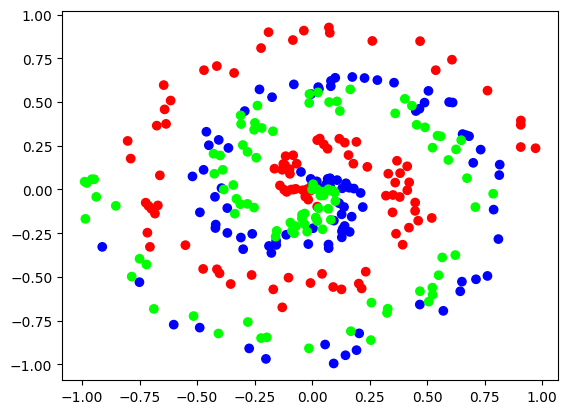

In [ ]:
X,y = create_data(100,3)
plt.scatter(X[:,0], X[:,1], c = y, cmap="brg")
plt.show()

### Softmax layer

In [ ]:
def softmax(inputs):
  # substracting the maximum value of each row from every element of input row to avoid
  # explosion of value
  exp_values = np.exp(x - np.max(x , axis=1, keepdims=True))
  proba = exp_values / np.sum(exp_values, axis=1, keepdims=True)
  return proba

In [ ]:
x = np.array([[5, 4, 2], [4, 2, 8], [4, 4, 1]])
x = softmax(x)
x

array([[0.70538451, 0.25949646, 0.03511903],
       [0.01794253, 0.00242826, 0.97962921],
       [0.48785555, 0.48785555, 0.0242889 ]])

In [ ]:
class Activation_Softmax:
  def forward(self, inputs:np.ndarray) -> np.ndarray:
    """
    to calculate the probablity we pass the output of the last layer to the softmax

    Args:
         output numpy array of the last layer

    Return:
           numpy array after transformation
    """
    # substracting maximum value from each value to avoid exploding exponential value
    exp_values = np.exp(inputs - np.max(inputs))
    self.output = exp_values / np.sum(exp_values)

    return self.output

  def backward(self, doutput):
    # Create empty array to hold gradient of inputs
    self.dinputs = np.empty_like(doutput)

    # Number of samples
    samples = len(doutput)

    # Iterate over each sample's output and gradient
    for idx, (output, grad_output) in enumerate(zip(self.output, doutput)):
      # Reshape output and gradient to 2D arrays
      output = output.reshape(-1, 1)
      grad_output = grad_output.reshape(-1, 1)

      # Create the Jacobian matrix of the softmax function
      jacobian_matrix = np.diagflat(output) - np.dot(output, output.T)

      # Calculate the gradient of inputs using the chain rule
      self.dinputs[idx] = np.dot(jacobian_matrix, grad_output)

### cross entropy loss layer

In [ ]:


class Loss_Crossentropy():

  def __init__(self):
    self.y_pred = None
    self.y_true = None

  def forward(self, y_pred:np.ndarray, y_true:np.ndarray) -> np.ndarray:
    """
    Function to calculate the cross entropy loss between y_pred and y_true

    Args:
        y_pred : numpy array of output from previous layer .
        y_true : numpy array of correct label . Should be 1D or 2D

    Return :
            It will return numpy array containing loss of the network .
    """
    self.y_pred = y_pred
    self.y_true = y_true

    # calculating the number of samples
    samples = len(y_pred)
    # if it is 0 in the y_pred then there will be problem while calculating log.
    y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)

    # if the true value in 1D like [1,2,0,1]
    if len(y_true.shape) == 1:
      # only taking the proba of index for which there is true value
      correct_confidences = y_pred_clipped[range(samples), y_true]

    # if the true value in 2D i.e one hot encoding like [[1,0,0],[0,0,1],[0,1,0]]
    elif len(y_true.shape) == 2:
      # multiplying true value with predicted value . It will result in for each list in list
      # all value will be zero but one value so doing sum will not affect result but decrease dim
      correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)

    negative_log_likelihoods = -np.log(correct_confidences)
    self.output =  np.mean(negative_log_likelihoods)

  def backward(self) -> np.ndarray:
    """
    Function to calculate the gradients of the loss with respect to the inputs (y_pred).

    Args:
        y_pred : numpy array of output from previous layer.
        y_true : numpy array of correct label. Should be 1D or 2D.

    """
    # calculating the number of samples
    samples = len(self.y_pred)

    # creating an array of zeros with the same shape as y_pred
    self.grad = np.zeros_like(self.y_pred)

    # if the true value is in 1D like [1,2,0,1]
    if len(self.y_true.shape) == 1:
      # for each sample, set the gradient of the correct class to -1 / correct_confidence
      self.grad[range(samples), self.y_true] = -1 / self.y_pred[range(samples), self.y_true]

    # if the true value is in 2D i.e., one-hot encoding like [[1,0,0],[0,0,1],[0,1,0]]
    elif len(self.y_true.shape) == 2:
      # for each sample, divide the predicted probabilities by the true values
      self.grad = -self.y_true / self.y_pred

    # normalize the gradients by the number of samples
    self.grad /= samples



In [ ]:
# X, y = create_data(100, 3)
# print(f"shape of X: {X.shape}")
# dense1 = Layer_Dense(2,3)
# activation1 = Activation_ReLU()

# dense2 = Layer_Dense(3,3)
# activation2 = Activation_Softmax()

# dense1.forward(X)
# print(f"shape after dense1: {dense1.output.shape}")
# activation1.forward(dense1.output)
# print(f"shape after activation1: {activation1.output.shape}")

# dense2.forward(activation1.output)
# print(f"shape after dense2: {dense2.output.shape}")
# activation2.forward(dense2.output)
# print(f"shape after activation2: {activation2.output.shape}")

# print(activation2.output[:5])

# loss_function = Loss_CategoricalCrossentropy()
# loss = loss_function.calculate(activation2.output, y)

# print(f"Loss : {loss}")

# print(f"len(y_pred): {len(activation2.output)}")
# print(f"len of y: {len(y.shape)}")


In [ ]:

y_pred = np.array([[0.0, 0.29754023, 0.23773866],
          [0.21735772, 0.0,  0.56863068],
          [0.38036754, 0.38036754, 0.0]])

y_true = np.array([1,2,3])

# y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
# print(y_pred_clipped)
# samples = len(y_pred)
# print(f"len(y_pred): {samples}")
# y_true = [1,2,1]

# correct_confidences = y_pred_clipped[range(samples), y_true]
print(y_true.shape)

(3,)


### Linear layer

In [ ]:
class Linear:
  def __init__(self, in_feature:int, out_feature:int):
    self.in_feature = in_feature
    self.out_feature = out_feature
    self.weight = np.random.randn(self.out_feature,self.in_feature)
    self.bias = np.random.randn(self.out_feature)

  def forward(self, input:np.ndarray) -> np.ndarray:
    """
    this function will calculate y i.e x@w^T + bias

    Args :
          input : input numpy array (x)

    Return : numpy array after linear transformation
    """
    self.input = input
    self.output = (self.input@(self.weight.T)) + self.bias


  def backward(self,prev_grad:np.ndarray) -> np.ndarray:
    """
    it will calculate gradient of loss w.r.t weight and bias

    Args :
          prev_grad : gradient of loss w.r.t previous layer

    Return : tuple with gradient of loss w.r.t weight and bias
    """

    self.grad_weight = (prev_grad.T)@self.input

    self.grad_bias = np.sum(prev_grad)

    self.grad_input = prev_grad@self.weight


  def update(self, learning_rate):
    self.weight -= learning_rate * self.grad_weight
    self.bias -= learning_rate * self.grad_bias


In [ ]:
x = np.array([[1,2,3,4,5]])
w = np.random.randn(3,5)
out = x@w.T
print(x.shape)
print(w.T.shape)
print(out)
print(out.shape)
print(x.T)
print(x.T.shape)
prev_grad = np.random.randn(out.shape[0],out.shape[1])
grad = prev_grad.T@x
print(grad)
print(grad.shape)
grad_inp = prev_grad@w
print(grad_inp)
print(grad_inp.shape)
grad_bias = np.sum(prev_grad)
print(grad_bias)

(1, 5)
(5, 3)
[[5.19529993 6.54922293 5.42652159]]
(1, 3)
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)
[[-1.44743302 -2.89486604 -4.34229906 -5.78973208 -7.23716509]
 [-0.97472774 -1.94945548 -2.92418321 -3.89891095 -4.87363869]
 [-0.09364146 -0.18728291 -0.28092437 -0.37456583 -0.46820729]]
(3, 5)
[[ 1.61583411  0.79678868  0.8562693  -3.94133708 -0.88491527]]
(1, 5)
-2.5158022136131417


### loading the data

In [ ]:

import numpy as np
import pandas as pd

# Import matplotlib for visualization
import matplotlib.pyplot as plt


In [ ]:

# train_data = datasets.MNIST(root = './data', train = True,
#                         transform = ToTensor(), download = True)

# test_data = datasets.MNIST(root = './data', train = False,
#                        transform = ToTensor(), download = True)

In [ ]:
data_train = pd.read_csv('/content/sample_data/mnist_train_small.csv')
data_test = pd.read_csv('/content/sample_data/mnist_test.csv')

In [ ]:
y = data_train.iloc[:,0]
y

0        5
1        7
2        9
3        5
4        2
        ..
19994    0
19995    1
19996    2
19997    9
19998    5
Name: 6, Length: 19999, dtype: int64

In [ ]:
y = y.to_numpy()
y

array([5, 7, 9, ..., 2, 9, 5])

In [ ]:
# changing label into one hot encoding
num_classes = 10

# Convert y to a one-hot encoded 2D array
y_one_hot = np.zeros((len(y), num_classes))
y_one_hot[np.arange(len(y)), y] = 1
y_one_hot


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X = data_train.iloc[:,1:]
X

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X = X.to_numpy()

In [ ]:
X = X.reshape(-1,28,28)
X

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
X.shape

(19999, 28, 28)

In [ ]:
y_one_hot.shape

(19999, 10)

In [ ]:
# since the number of data is incompatible with good batch size , we will last row from data
# to get 19998 data then will will divide it into batch size of 66
# Remove the last row from X
X_new = X[:-1, :, :]
y_one_hot_new = y_one_hot[:-1, :]

print(X_new.shape)
print(y_one_hot_new.shape)

(19998, 28, 28)
(19998, 10)


In [ ]:
# dividing the data into batches
X_batch = X_new.reshape(-1,33,28,28)
y_batch = y_one_hot_new.reshape(-1,33,10)

print(X_batch.shape)
print(y_batch.shape)

(606, 33, 28, 28)
(606, 33, 10)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X_batch,y_batch,test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(424, 33, 28, 28)
(424, 33, 10)
(182, 33, 28, 28)
(182, 33, 10)


### fully intergrated architecture

In [ ]:
class FirstNetwork:
  def __init__(self):
    self.conv1 = Convoluation((2,2),0,1)
    self.act1 = Activation_ReLU()

    self.conv2 = Convoluation((2,2),0,1)
    self.act2 = Activation_ReLU()

    self.pool = Maxpool(2)
    self.flatten = Flatten()

    self.linear1 = Linear(169,80)
    self.act3 = Activation_ReLU()

    self.linear2 = Linear(80,10)


  def forward(self,x):
    self.conv1.forward(x)
    self.act1.forward(self.conv1.output)

    self.conv2.forward(self.act1.output)
    self.act2.forward(self.conv2.output)

    self.pool.forward(self.act2.output)
    self.flatten.forward(self.pool.output)

    self.linear1.forward(self.flatten.output)
    self.act3.forward(self.linear1.output)

    self.linear2.forward(self.act3.output)

    return self.linear2.output



In [ ]:
def backpropogation(network, loss_fn, learning_rate=0.1):
  """
  this function will do backpropogation and then update the weight and bias of the layers

  Args :
        network : instance of the model
        loss_fn : instance of the loss function
        learning_rate : it will use for weight updation
  """
  # backward pass
  loss_fn.backward()
  network.linear2.backward(loss_fn.grad)
  network.act3.backward(network.linear2.grad_input)
  network.linear1.backward(network.act3.grad)

  network.flatten.backward(network.linear1.grad_input)
  network.pool.backward(network.flatten.grad)
  network.act2.backward(network.pool.grad)
  network.conv2.backward(network.act2.grad)
  network.act1.backward(network.conv2.grad_input)
  network.conv1.backward(network.act1.grad)

  # update weight and bias of convolutation and linear layer
  # print(f"bias of the linear2 before updating: {network.linear2.bias}")
  # print(f"weight of the linear2 layer before updating {network.linear2.weight}")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  network.linear2.update(learning_rate)
  # print(f"bias of the linear2 after updating: {network.linear2.bias}")
  # print(f"weight of the linear2 layer after updating {network.linear2.weight}")

  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")

  # print(f"bias of the linear1 before updating: {network.linear1.bias}")
  # print(f"weight of the linear1 layer before updating {network.linear1.weight}")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  network.linear1.update(learning_rate)
  # print(f"bias of the linear1 after updating: {network.linear1.bias}")
  # print(f"weight of the linear1 layer after updating {network.linear1.weight}")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  network.conv2.update(learning_rate)
  network.conv1.update(learning_rate)




In [ ]:
# we will train the model on X_train and y_train
print(X_train.shape)
print(y_train.shape)

(424, 33, 28, 28)
(424, 33, 10)


In [ ]:
# we will take each batch and then run the forward method of model , then calculate the loss then
# we will run backpropogation , again next batch of data will be use in same sequence
# in that way our model will be train



In [ ]:
print(X_new.shape)
print(y_one_hot_new.shape)

(19998, 28, 28)
(19998, 10)


In [ ]:
X_temp = X_new[:10000, : , :]
y_temp = y_one_hot_new[:10000, :]
print(X_temp.shape)
print(y_temp.shape)

(10000, 28, 28)
(10000, 10)


In [ ]:
y_true = [[0,0,1,0,0]]
y_pred = [[0.5,0.2,0.1,0.1,0.2]]

y_pred_clipped = np.clip(y_pred, 1e-7, 1-1e-7)
correct_confidences = np.sum(y_pred_clipped*y_true, axis=1)
print(correct_confidences)
negative_log_likelihoods = -np.log(correct_confidences)
print(negative_log_likelihoods)
output =  np.mean(negative_log_likelihoods)
print(output)


[0.1]
[2.30258509]
2.3025850929940455


In [ ]:
# # Now we will use SGD method i.e we will take every data and then train the model

# # get a instance of FirstNetwork and loss function
# model1 = FirstNetwork()
# loss_fn = Loss_Crossentropy()



# # Iterate through each data point in X
# for i in range(10000):

#   data_X = X_temp[i]
#   label_y = y_temp[i]

#   # Get the output for the current data point using the network's forward method
#   output = model1.forward(data_X)

#   # Label y will be 1D , change it into 2D then calculate the loss
#   loss_fn.forward(output,label_y.reshape(1,-1))

#   if i%100 == 0:

#     print(f"loss: {loss_fn.output}")

#   # do backpropogation to update the weight and bias of the network
#   backpropogation(network=model1,loss_fn=loss_fn,learning_rate=0.1)


# Modifying above code for batch training

### Conv layer

In [ ]:
class Convoluation:

  def __init__(self,filter_size:tuple=(2,2),padding_layer:int=0,stride:int=1):
    # initialize the filter using He initialization method .
    #Normal distribution (0 , sd = sqrt(filter_height* filter_width))
    fan_in = filter_size[0]*filter_size[1]
    stddev = np.sqrt(2.0/fan_in)
    self.filter = np.random.normal(loc=0, scale=stddev ,size=(filter_size[0],filter_size[1])).astype(np.float64)
    self.bias = 0.0
    self.padding_layer = padding_layer
    self.stride = stride


  def padding(self,x, pad_size):
    """
    Pad a 2D numpy array 'x' with zeros.

    Parameters:
    x (numpy.ndarray): Input 2D array.
    pad_size (int): Number of rows/columns to pad on each side.

    Returns:
    numpy.ndarray: Padded 2D array.
    """
    return np.pad(x, pad_size, mode='constant')


  def forward(self, input: np.ndarray) -> np.ndarray:
    """
    This function will do convolution operation on input array with filter
    and will also add bias after it.

    Args:
        input: input array (image) with shape (batch_size, height, width)

    Returns:
        Output array after convolution with shape (batch_size, output_height, output_width)
    """
    self.input = input
    batch_size, input_height, input_width = input.shape

    # Calculate the output height and width based on filter size and padding
    output_height = int(((input_height - self.filter.shape[0] + (2 * self.padding_layer)) / self.stride) + 1)
    output_width = int(((input_width - self.filter.shape[1] + (2 * self.padding_layer)) / self.stride) + 1)

    # Initialize the output array with zeros
    self.output = np.zeros((batch_size, output_height, output_width), dtype=np.float64)

    # Loop over each input in the batch
    for batch_idx in range(batch_size):
        # Get the current input from the batch
        current_input = input[batch_idx]

        # If we want to do padding around the input
        pad_input = self.padding(current_input, self.padding_layer)

        # For putting element in each row of output array
        out_h = 0
        # Loop through the pad_input array in rows
        for i in range(0, pad_input.shape[0] - self.filter.shape[0] + 1, self.stride):
            # For putting element in column in output array
            out_w = 0
            # Loop through the pad_input column
            for j in range(0, pad_input.shape[1] - self.filter.shape[1] + 1, self.stride):
                # Loop through all rows and columns of the filter row-wise
                for f_h in range(self.filter.shape[0]):
                    for f_w in range(self.filter.shape[1]):
                        # Putting element in output array after convolution (X * w)
                        self.output[batch_idx][out_h][out_w] += self.filter[f_h][f_w] * pad_input[i + f_h][j + f_w]
                out_w += 1
            out_h += 1

        # Add bias to the output
        self.output[batch_idx] += self.bias



  def backward(self, prev_grad: np.ndarray):
    """
    This backward function will calculate the gradient of loss w.r.t weight and bias.

    Args:
        prev_grad: It is the gradient of loss w.r.t next layer. It will be used in
                  calculating the gradient of loss wr.t weight and bias.

    """
    batch_size, output_height, output_width = prev_grad.shape

    # First try to find out the gradient of loss w.r.t bias
    self.grad_bias = np.sum(prev_grad, axis=(1, 2), dtype=np.float64)

    # Now try to find out the gradient of loss w.r.t weight
    # It will be convolution operation of padded input array and prev_grad array
    self.grad_weight = np.zeros((batch_size, self.filter.shape[0], self.filter.shape[1]), dtype=np.float64)

    # doing just to get shape of input after padding
    # If we want to do padding around the input
    pad_input = self.padding(self.input[0], self.padding_layer)

    # Lists to store gradients for each input in the batch
    self.grad_input = np.zeros((batch_size , pad_input.shape[0], pad_input.shape[1]), dtype=np.float64)

    # Loop over each input in the batch
    for batch_idx in range(batch_size):
      # Get the current input from the batch
      current_input_without_pad = self.input[batch_idx]

      # If we want to do padding around the input , it will become current input
      current_input = self.padding(current_input_without_pad, self.padding_layer)

      # Get the padded gradient from the batch
      current_prev_grad = prev_grad[batch_idx]

      for row in range(current_prev_grad.shape[0]):
        for col in range(current_prev_grad.shape[1]):
          vertical_start = row*self.stride
          vertical_end = vertical_start + self.filter.shape[0]
          horizontal_start = col*self.stride
          horizontal_end = horizontal_start + self.filter.shape[1]

          slice_input = current_input[vertical_start:vertical_end, horizontal_start:horizontal_end]

          self.grad_weight[batch_idx] += slice_input*current_prev_grad[row,col]

      # Finding the gradient of loss w.r.t input.
      # Padding around the prev_grad so that we can do full convolution.
      pad_prev_grad = self.padding(current_prev_grad, self.filter.shape[0] - 1)

      # Rotate the filter by 180 degrees for convolution
      rotated_filter = np.rot90(self.filter, 2)

      row_grad = 0  # For looping through all the row of prev_grad
      # Loop through all the row of pad_prev_grad array
      for i in range(0, pad_prev_grad.shape[0] - self.filter.shape[0] + 1, 1):
          col_grad = 0  # For looping through all the column of prev_grad
          # Loop through all the column of padded input array
          for j in range(0, pad_prev_grad.shape[1] - self.filter.shape[1] + 1, 1):
              # Loop through all rows and columns of the prev_grad row-wise
              for f_h in range(self.filter.shape[0]):
                  for f_w in range(self.filter.shape[1]):
                      # Putting element in grad_input array after convolution (input, prev_grad)
                      self.grad_input[batch_idx][row_grad][col_grad] += rotated_filter[f_h][f_w] * pad_prev_grad[i + f_h][j + f_w]
              col_grad += 1
          row_grad += 1


   ### Above function backward will produce three things \
      #  1. self.grad_input
      #  2. self.grad_weight
      #  3. self.grad_bias

  def update(self, learning_rate):
    """
    This will take the learning rate as a parameter and will update the weight and bias of the filter and layer.
    """
    # Update the weight and bias for the current input in the batch
    self.filter -= learning_rate * np.mean(self.grad_weight, axis = 0, dtype=np.float64)
    self.bias -= learning_rate * np.mean(self.grad_bias, axis = 0, dtype=np.float64)



In [ ]:
# def padding_1d(x,layer):
#     z = np.array([0])
#     z = np.repeat(z, layer)
#     return np.concatenate([z, x, z])

# def padding2( x,layer):
#   outs = np.array([padding_1d(row,layer) for row in x])
#   zero_layer = np.array([0])
#   zero_layer = np.array(np.repeat(zero_layer, len(outs[0]))).reshape(1,-1)
#   zero_layer = np.repeat(zero_layer,layer,axis=0)
#   print(zero_layer)
#   print(outs)
#   full_padding = np.concatenate((zero_layer, outs, zero_layer), axis=0)
#   return np.array(full_padding)

In [ ]:
# x = np.array([[1,2,3,4,5], [2,3,45,6,7], [2,4,5,6,7]])
# y = padding2(x,2)
# print(y.shape)
# print(y)

In [ ]:
x = np.random.randn(1,7,7)
conv = Convoluation((3,3),2,2)
conv.forward(x)
print(f"output: {conv.output}")
print(f"conv.output.shape : {conv.output.shape}")
grad = np.random.randn(1,5,5)
conv.backward(grad)
print(f"grad_weight: {conv.grad_weight}")
print(f"grad_input: {conv.grad_input}")
print(f"grad_bias: {conv.grad_bias}")

output: [[[ 0.09438967 -0.56162881  1.78719433 -0.46616543 -0.22455125]
  [ 0.0250496  -3.09121191  1.21967862  0.78536421 -1.14523854]
  [ 0.03445551  0.65590137 -0.89512482  4.0815872  -0.42722188]
  [ 0.11226974  1.44756196  0.28676854  1.69445247  1.17991356]
  [-0.03801549  1.5519333  -0.26520878 -0.20433244  0.53825932]]]
conv.output.shape : (1, 5, 5)
grad_weight: [[[ 3.38036284 -0.55305411 -1.89369793]
  [ 0.91265649  6.19757272  4.69235408]
  [ 0.87837607  3.84904019  1.81495958]]]
grad_input: [[[-0.16840694 -0.44037576  0.26744359  1.04750683  0.57689279
    0.36651085 -0.05626907  0.          0.          0.
    0.        ]
  [-0.34622329 -0.14157     0.35230931  0.58790552  0.16744065
   -0.50146814  0.12805101  0.          0.          0.
    0.        ]
  [-0.15491802 -1.66124003 -0.92280554  0.58789883  2.73427629
   -0.55017995 -0.08663834  0.          0.          0.
    0.        ]
  [ 0.41844191 -0.42836475  0.93559806 -1.58264217  2.10457687
    0.61861151 -0.09594784  

### Maxpool layer

In [ ]:
class Maxpool:

  def __init__(self,size_of_window:int=1):
    self.size_of_window = size_of_window


  def forward(self,input:np.ndarray) -> np.ndarray:
    """
    This forward layer will take maximum from the feature in window of size = size_of_window .

    Args:
         input : numpy input array that we have to pass to maxpool layer

    """
    self.input = input
    batch_size = self.input.shape[0]

    # calculating the height and width of the input matrix
    height_input = self.input.shape[1]
    width_input = self.input.shape[2]

    # if the size_of_window is not compatiable with the height and width of input matrix
    # then return .
    if(height_input%self.size_of_window != 0 or width_input%self.size_of_window != 0):
      return ("size of pooling layer is not compatable with size of x")

    # defining a output zeros matrix with size height_input//size_of_window , width_input//size_of_window
    self.output = np.zeros(shape=(batch_size, height_input//self.size_of_window, width_input//self.size_of_window), dtype=np.float64)

    for r in range(batch_size):

      # take a index at 0 for row of output matrix
      out_h = 0
      # looping through the row of input matrix by step = size of window
      for i in range(0, height_input, self.size_of_window):
        # take a index of width = 0 for column of output matrix
        out_w = 0
        # looping through the every column for each row of input matrix with step = size of window
        for j in range(0, width_input, self.size_of_window):
          # getting maximum number from the window of size*size from the input matrix
          max_num = float('-inf')
          for k in range(self.size_of_window):
            for l in range(self.size_of_window):
                if self.input[r][i+k][j+l] > max_num:
                    max_num = self.input[r][i+k][j+l]

          # putting the maximum number that we get from window into output matrix
          self.output[r][out_h][out_w] = max_num
          # incrementing the column of output matrix by 1 so that we can put next element there
          out_w+=1
        # incrementing the row of output matrix after going through every column for previous row
        out_h+=1


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
      this function will calculate backward propogation for maxpool layer.
      this function will give output such that it will put prev_grad at maximum
      in window and zero else where for every window.

      Args :
            prev_grad : gradient of the prev layer

    """
    batch_size = self.input.shape[0]
    # take a numpy array of size input.shape with all zeros .
    self.grad = np.zeros((batch_size, self.input.shape[1], self.input.shape[2]), dtype=np.float64)

      # calculating the height and width of the input matrix
    height_input = self.input.shape[1]
    width_input = self.input.shape[2]

    for r in range(batch_size):

      # take a index at 0 for row of prev_grad matrix
      out_h = 0
      # looping through the row of input matrix by step = size of window
      for i in range(0, height_input, self.size_of_window):
        # take a index of width = 0 for column of output matrix
        out_w = 0
        # looping through the every column for each row of input matrix with step = size of window
        for j in range(0, width_input, self.size_of_window):
          # getting maximum number from the window of size*size from the input matrix
          max_num = float('-inf')
          max_x = 0
          max_y = 0
          for k in range(self.size_of_window):
            for l in range(self.size_of_window):
                if self.input[r][i+k][j+l] > max_num:
                    max_num = self.input[r][i+k][j+l]
                    max_x = i+k
                    max_y = j+l

          # putting the value from prev_grad in grad matrix on that index
          # that will give max value
          self.grad[r][max_x][max_y] = prev_grad[r][out_h][out_w]
          # incrementing the column of prev_grad matrix by 1 so that we can put next element there
          out_w+=1
        # incrementing the row of prev_grad matrix after going through every column for previous row
        out_h+=1



In [ ]:
x = np.array([[[7,3,5,21], [8,7,1,6], [4,9,3,9], [0,8,4,5]], [[7,13,5,21], [8,7,1,16], [4,9,3,9], [10,8,4,15]]])
pool = Maxpool(2)
pool.forward(x)
print(pool.output)
prev_grad = [[[1,2], [5,3]], [[5,3], [8,34]]]
pool.backward(prev_grad)
print(pool.grad)

[[[ 8. 21.]
  [ 9.  9.]]

 [[13. 21.]
  [10. 15.]]]
[[[ 0.  0.  0.  2.]
  [ 1.  0.  0.  0.]
  [ 0.  5.  0.  3.]
  [ 0.  0.  0.  0.]]

 [[ 0.  5.  0.  3.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 8.  0.  0. 34.]]]


### Flatten layer

In [ ]:
class Flatten:

  def __init__(self):
    self.input = None

  def forward(self,input:np.ndarray) -> np.ndarray:
    """
    After passing input image through all the convoulation layer , now we have to give it to fully
    connected layer but before that first we will change it into 1D so that we can learn all the
    kernel parameter

    Args :
          input : numpy array of previous layer that we have to pass through the
                  flatten layer

    """
    self.input = input
    batch_size = self.input.shape[0]

    # I don't know what is the flatten dim of input so I will use temp variable to
    # calcualte the dim of single input after flatting and the use info to create output
    temp = input[0].reshape(1,-1)              # just for knowing dim . To use in output
    self.output = np.zeros((batch_size, 1, temp.shape[1]))

    # going through the each input of batches one by one
    for i in range(batch_size):
      # changing the 2D input numpy array into 1D input array
      self.output[i] =  self.input[i].reshape(1,-1)


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
    From fully connected layer we will get gradient of loss . Now we will just reshape it into
    shape of input and pass it .

    Args :
          numpy array of gradient of loss w.r.t to previous layer

    """
    batch_size = self.input.shape[0]

    self.grad = np.zeros((batch_size, self.input.shape[1], self.input.shape[2]), dtype=np.float64)

    for i in range(batch_size):


      # resizing the prev_grad into the shape of input
      self.grad[i] =  prev_grad[i].reshape(self.input.shape[1], self.input.shape[2])



In [ ]:
x = np.array([[[1,2,3],[2,34,4],[3,2,4]], [[2,3,4],[2,4,5],[5,4,5]]])
flatten = Flatten()
flatten.forward(x)
print(flatten.output)
print("-------------")
prev_grad = np.array([[[1,2,3,4,5,6,7,8,9]], [[9,8,7,6,5,4,3,2,1]]])
flatten.backward(prev_grad)
print(flatten.grad)

[[[ 1.  2.  3.  2. 34.  4.  3.  2.  4.]]

 [[ 2.  3.  4.  2.  4.  5.  5.  4.  5.]]]
-------------
[[[1. 2. 3.]
  [4. 5. 6.]
  [7. 8. 9.]]

 [[9. 8. 7.]
  [6. 5. 4.]
  [3. 2. 1.]]]


### linear layer

In [ ]:
class Linear:
  def __init__(self, in_feature:int, out_feature:int):
    self.in_feature = in_feature
    self.out_feature = out_feature
    # initialize the weight using He initialization method .
    # Taking value from the normal distribution (0, std = sqrt(2/f_in))
    stddev = np.sqrt(2.0/in_feature)
    self.weight = np.random.normal(loc=0, scale=stddev, size=(self.out_feature,self.in_feature)).astype(np.float64)
    self.bias = np.zeros(shape=self.out_feature, dtype=np.float64)

  def forward(self, input:np.ndarray) -> np.ndarray:
    """
    this function will calculate y i.e x@w^T + bias

    Args :
          input : input numpy array (x)

    Return : numpy array after linear transformation
    """
    self.input = input
    batch_size = self.input.shape[0]

    self.output = np.zeros((batch_size, 1, self.out_feature), dtype=np.float64)

    for i in range(batch_size):
      self.output[i] = (self.input[i]@(self.weight.T)) + self.bias


  def backward(self,prev_grad:np.ndarray) -> np.ndarray:
    """
    it will calculate gradient of loss w.r.t weight and bias

    Args :
          prev_grad : gradient of loss w.r.t previous layer

    Return : tuple with gradient of loss w.r.t weight and bias
    """
    batch_size = self.input.shape[0]
    self.grad_weight = np.zeros((batch_size, self.out_feature, self.in_feature), dtype=np.float64)     # grad_weight for each input will be (3*1)*(1*5) = (3*5) , shape of weight
    self.grad_bias = np.zeros((batch_size, 1), dtype=np.float64)
    self.grad_input = np.zeros((batch_size, 1, self.in_feature), dtype=np.float64)                     # grad_input for each input (1*3)*(3*5) = (1*5) , shape of the input

    for i in range(batch_size):
      self.grad_weight[i] = (prev_grad[i].T)@self.input[i]

      self.grad_bias[i] = np.sum(prev_grad[i])

      self.grad_input[i] = prev_grad[i]@self.weight


  def update(self, learning_rate):
    self.weight -= learning_rate * np.mean(self.grad_weight, axis=0, dtype=np.float64)
    self.bias -= learning_rate * np.mean(self.grad_bias, axis=0, dtype=np.float64)


In [ ]:
# output_batch = np.zeros((10, 1, 3))
# output_batch[1] = [[1,2,3]]
# output_batch

In [ ]:
input = np.array([[[1,2,3,4,5]], [[2,3,5,65,3]], [[2,4,5,6,7]],[[3,4,56,6,76]]])
print(input.shape)

lin1 = Linear(5,3)
lin1.forward(input)
print(lin1.output)
print(lin1.output.shape)

prev_grad = np.random.randn(4,1,3)
lin1.backward(prev_grad)

print(lin1.grad_weight)
print("---------------")
print(lin1.grad_bias)
print("--------------")
print(lin1.grad_input)


(4, 1, 5)
[[[  6.95257977   6.12325      8.31691988]]

 [[ 25.56594886  53.79770943   7.7429751 ]]

 [[ 10.56280986   9.61040132  12.78048058]]

 [[ 77.03032096  42.58557011 133.38945707]]]
(4, 1, 3)
[[[-1.76169299e+00 -3.52338598e+00 -5.28507897e+00 -7.04677196e+00
   -8.80846496e+00]
  [ 1.04605663e+00  2.09211325e+00  3.13816988e+00  4.18422650e+00
    5.23028313e+00]
  [-2.25301359e+00 -4.50602717e+00 -6.75904076e+00 -9.01205435e+00
   -1.12650679e+01]]

 [[ 9.31737638e-01  1.39760646e+00  2.32934409e+00  3.02814732e+01
    1.39760646e+00]
  [-1.82535751e+00 -2.73803627e+00 -4.56339378e+00 -5.93241192e+01
   -2.73803627e+00]
  [-1.82685429e+00 -2.74028144e+00 -4.56713573e+00 -5.93727645e+01
   -2.74028144e+00]]

 [[-2.91246236e+00 -5.82492472e+00 -7.28115589e+00 -8.73738707e+00
   -1.01936183e+01]
  [-5.74529235e-03 -1.14905847e-02 -1.43632309e-02 -1.72358770e-02
   -2.01085232e-02]
  [ 9.49798470e-01  1.89959694e+00  2.37449617e+00  2.84939541e+00
    3.32429464e+00]]

 [[-5.30943

In [ ]:
# x = np.array([[[1,2,3],[2,1,4]], [[5,10,3], [4,5,1]], [[2,5,8],[6,7,3]]])
# x = np.array([[2],[1],[6]])
# y = np.mean(x, axis=0)
# print(y.shape)
# print(y)
# z = np.random.randn(1)
# print(z-y)

### Relu Activation layer

In [ ]:
class Activation_ReLU:
  def forward(self, inputs:np.ndarray) -> np.ndarray:
    """
    after multiplying weight with previous layer output and adding bias , we will pass the
    result through relu activation layer . If value is greater than 0 it will be same
    otherwise it will be zero .

    Args :
          output numpy array after dot product and bias addition


    """
    self.input = inputs
    batch_size = inputs.shape[0]
    self.output = np.zeros((batch_size, inputs.shape[1], inputs.shape[2]), dtype=np.float64)

    for i in range(batch_size):
      self.output[i] = np.maximum(0, inputs[i])


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
    Calculate the gradient of loss w.r.t the ReLU activation layer.

    Args:
        prev_grad: Numpy array of the gradient of loss w.r.t the outputs from the previous layer.

    Return:
        Numpy array containing the gradient of loss w.r.t the inputs to the ReLU activation layer.
    """
    batch_size = prev_grad.shape[0]

    self.grad = np.zeros_like(prev_grad, dtype=np.float64)

    for i in range(batch_size):
      self.grad[i] = np.where(self.output[i] > 0, prev_grad[i], 0)

In [ ]:
# x = np.array([[[1,-2,3]], [[2,3,-4]], [[-4,-2,-1]], [[-1.3, -3, 3.24]]])
# print(x.shape)
# act1 = Activation_ReLU()
# act1.forward(x)
# print(act1.output)
# print(act1.output.shape)
# print("-----------------")
# prev_grad = np.array([[[1.07,0.2,3.123]], [[0.42,0.3433,0.944]], [[0.4344,0.3432,-1]], [[-1.3, 0.433, 3.24]]])
# act1.backward(prev_grad)
# print(act1.grad)

In [ ]:
class Activation_LeakyReLU:
  def forward(self, inputs:np.ndarray) -> np.ndarray:
    """
    after multiplying weight with previous layer output and adding bias , we will pass the
    result through relu activation layer . If value is greater than 0 it will be same
    otherwise it will be 0.01*input .

    Args :
          output numpy array after dot product and bias addition


    """
    self.input = inputs
    batch_size = inputs.shape[0]
    self.output = np.zeros((batch_size, inputs.shape[1], inputs.shape[2]), dtype=np.float64)

    for i in range(batch_size):
      self.output[i] = np.maximum(0.01*inputs[i], inputs[i])


  def backward(self, prev_grad:np.ndarray) -> np.ndarray:
    """
    Calculate the gradient of loss w.r.t the LeakyReLU activation layer.
    If the output is positive then put prev_grad as it is . And if output is negative
    then put grad as 0.01 .

    Args:
        prev_grad: Numpy array of the gradient of loss w.r.t the outputs from the previous layer.

    Return:
        Numpy array containing the gradient of loss w.r.t the inputs to the ReLU activation layer.
    """
    batch_size = prev_grad.shape[0]

    self.grad = np.zeros_like(prev_grad, dtype=np.float64)

    for i in range(batch_size):
      self.grad[i] = np.where(self.output[i] > 0, prev_grad[i], 0.01)

### Cross Entropy loss

In [ ]:
def softmax(inputs:np.ndarray) -> np.ndarray:
    """
    to calculate the probablity we pass the output of the last layer to the softmax

    Args:
         output numpy array of the last layer

    Return:
           numpy array after transformation
    """
    # substracting maximum value from each value to avoid exploding exponential value
    exp_values = np.exp(inputs - np.max(inputs))
    output = exp_values / np.sum(exp_values)

    return output

In [ ]:
pred = np.array([[ 9.24509915e+01, -5.57731481e+02 ,-1.74263620e+03 , 1.35156736e+03,1.13105210e+03 , 2.26596646e+03, -3.41934527e+01 , 1.99968764e+03,4.63964018e+03 ,-2.15820369e+02]])
print(np.max(pred))
print(pred-np.max(pred))
print(np.sum(pred))
y = softmax(pred)
print(y)

4639.64018
[[-4547.1891885 -5197.371661  -6382.27638   -3288.07282   -3508.58808
  -2373.67372   -4673.8336327 -2639.95254       0.        -4855.460549 ]]
8929.983228800002
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


In [ ]:
class Softmax_Crossentropy_Loss:

  def __init__(self):
    self.y_pred = None
    self.y_true = None


  def softmax(self, inputs:np.ndarray) -> np.ndarray:
    """
    to calculate the probablity we pass the output of the last layer to the softmax

    Args:
         output numpy array of the last layer

    Return:
           numpy array after transformation
    """
    # substracting maximum value from each value to avoid exploding exponential value
    exp_values = np.exp(inputs - np.max(inputs), dtype=np.float64)
    output = exp_values / np.sum(exp_values, dtype=np.float64)

    output = np.float64(output)

    return output


  def forward(self, y_pred:np.ndarray, y_true:np.ndarray) -> np.ndarray:
    """
    For input first it will calculate softmax and then it will calculate softmaxcross
    entropy loss .

    Args:
        y_pred : numpy array of output from previous layer .
        y_true : numpy array of correct label . Should be 1D or 2D

    Return :
            It will return numpy array containing loss of the network .
    """
    self.y_pred = y_pred
    self.y_true = y_true

    batch_size = y_pred.shape[0]

    self.output = np.zeros(batch_size, dtype=np.float64)

    for i in range(batch_size):
      # taking out the ele one by one from batches .
      current_y_pred = y_pred[i]         # It will like [[1,2,3,4,5]]
      y_true_current = y_true[i]         # It will like [0,1,0,0,0]
      # changing current_y_true to 2D for convienence in calculation
      current_y_true = y_true_current.reshape(1,-1)       # It will become like [[0,1,0,0,0]]

      # calculating the number of samples
      samples = current_y_pred.shape[1]

      # put the currenty_pred into softmax function to get softmax value
      softmax_y_pred = self.softmax(current_y_pred)

      # if it is 0 in the y_pred then there will be problem while calculating log.
      y_pred_clipped = np.clip(softmax_y_pred, 1e-18, 1-1e-18)    # Do not use this line without softmax

      # if the true value in 1D like [1,2,0,1]
      if len(current_y_true.shape) == 1:
        # only taking the proba of index for which there is true value
        correct_confidences = y_pred_clipped[range(samples), current_y_true]

      # if the true value in 2D i.e one hot encoding like [[1,0,0],[0,0,1],[0,1,0]]
      elif len(current_y_true.shape) == 2:
        # multiplying true value with predicted value . It will result in for each list in list
        # all value will be zero but one value so doing sum will not affect result but decrease dim
        correct_confidences = np.sum(y_pred_clipped*current_y_true, axis=1, dtype = np.float64)

      negative_log_likelihoods = -np.log(correct_confidences, dtype = np.float64)
      self.output[i] =  np.mean(negative_log_likelihoods, dtype = np.float64)

  def backward(self) -> np.ndarray:
    """
    Calculate the gradient of the loss with respect to y_pred.

    Return:
        Gradient of loss with respect to y_pred (numpy array).
    """
    batch_size = self.y_pred.shape[0]
    self.grad = np.zeros_like(self.y_pred)

    for i in range(batch_size):
        current_y_pred = self.y_pred[i]
        y_true_current = self.y_true[i]
        current_y_true = y_true_current.reshape(1,-1)

        softmax_y_pred = self.softmax(current_y_pred)
        y_pred_clipped = np.clip(softmax_y_pred, 1e-18, 1-1e-18)

        # Calculate the gradient of loss w.r.t. softmax output
        grad_softmax = (y_pred_clipped - current_y_true)

        self.grad[i] = np.float64(grad_softmax)




In [ ]:
class Loss_Crossentropy:

  def __init__(self):
    self.y_pred = None
    self.y_true = None

  def forward(self, y_pred:np.ndarray, y_true:np.ndarray) -> np.ndarray:
    """
    Function to calculate the cross entropy loss between y_pred and y_true

    Args:
        y_pred : numpy array of output from previous layer .
        y_true : numpy array of correct label . Should be 1D or 2D

    Return :
            It will return numpy array containing loss of the network .
    """
    self.y_pred = y_pred
    self.y_true = y_true

    batch_size = y_pred.shape[0]

    self.output = np.zeros(batch_size)

    for i in range(batch_size):
      # taking out the ele one by one from batches .
      current_y_pred = y_pred[i]         # It will like [[1,2,3,4,5]]
      current_y_true = y_true[i]         # It will like [0,1,0,0,0]
      # changing current_y_true to 2D for convienence in calculation
      current_y_true = current_y_true.reshape(1,-1)       # It will become like [[0,1,0,0,0]]

      # calculating the number of samples
      samples = current_y_pred.shape[1]
      # if it is 0 in the y_pred then there will be problem while calculating log.
      # y_pred_clipped = np.clip(current_y_pred, 1e-7, 1-1e-7)    # Do not use this line without softmax

      # if the true value in 1D like [1,2,0,1]
      if len(current_y_true.shape) == 1:
        # only taking the proba of index for which there is true value
        correct_confidences = current_y_pred[range(samples), current_y_true]

      # if the true value in 2D i.e one hot encoding like [[1,0,0],[0,0,1],[0,1,0]]
      elif len(current_y_true.shape) == 2:
        # multiplying true value with predicted value . It will result in for each list in list
        # all value will be zero but one value so doing sum will not affect result but decrease dim
        correct_confidences = np.sum(current_y_pred*current_y_true, axis=1)

      negative_log_likelihoods = -np.log(correct_confidences)
      self.output[i] =  np.mean(negative_log_likelihoods)

  def backward(self) -> np.ndarray:
    """
    Function to calculate the gradients of the loss with respect to the inputs (y_pred).

    Args:
        y_pred : numpy array of output from previous layer.                     # [[[1,2,3,4,5]], [[1,2,3,44,5]], [[2,3,4,5,4]]]
        y_true : numpy array of correct label. Should be 1D or 2D.              # [[0,0,1,0,0], [1,0,0,0,0], [0,1,0,0,1]]

    """
    # calculating the number of batch_size
    batch_size = y_pred.shape[0]

    # creating an array of zeros with the same shape as y_pred
    self.grad = np.zeros_like(self.y_pred)

    for i in range(batch_size):
      # taking out the ele one by one from batches .
      current_y_pred = self.y_pred[i]         # It will like [[1,2,3,4,5]]
      current_y_true = self.y_true[i]         # It will like [0,1,0,0,0]
      # changing current_y_true to 2D for convienence in calculation
      current_y_true = current_y_true.reshape(1,-1)       # It will become like [[0,1,0,0,0]]

      # calculating the number of samples
      samples = current_y_pred.shape[1]

      # if the true value is in 1D like [1,2,0,1]
      if len(current_y_true.shape) == 1:
        # for each sample, set the gradient of the correct class to -1 / correct_confidence
        self.grad[i][range(samples), current_y_true] = -1 / current_y_pred[range(samples), current_y_true]

      # if the true value is in 2D i.e., one-hot encoding like [[1,0,0],[0,0,1],[0,1,0]]
      elif len(current_y_true.shape) == 2:
        # for each sample, divide the predicted probabilities by the true values
        self.grad[i] = -current_y_true / current_y_pred

      # normalize the gradients by the number of samples
      self.grad[i] /= batch_size



In [ ]:
def softmax( inputs:np.ndarray) -> np.ndarray:
    """
    to calculate the probablity we pass the output of the last layer to the softmax

    Args:
         output numpy array of the last layer

    Return:
           numpy array after transformation
    """
    # substracting maximum value from each value to avoid exploding exponential value
    exp_values = np.exp(inputs - np.max(inputs), dtype=np.float64)
    output = exp_values / np.sum(exp_values, dtype=np.float64)

    output = np.float64(output)

    return output

In [ ]:
y_pred = np.array([[[  13.5829348  ,  36.48532427  , 77.40344015  ,-24.71464484  ,  0.35529315, 161.14677311 ,  42.50280807 , -54.77230824 , -23.1689407,   -17.51465871]]])

In [ ]:
y_pred = np.array([[[  13.5829348  ,  36.48532427  , 77.40344015  ,-24.71464484  ,  0.35529315, 161.14677311 ,  42.50280807 , -54.77230824 , -23.1689407,   -17.51465871]]])
y_true = np.array([[0., 0., 0., 0. ,0., 0., 0. ,0. ,0., 1.]])

loss = Softmax_Crossentropy_Loss()
loss.forward(y_pred,y_true)
print(loss.output)
print("---------------")
loss.backward()
print(loss.grad)

[41.44653167]
---------------
[[[ 1.e-18  1.e-18  1.e-18  1.e-18  1.e-18  1.e+00  1.e-18  1.e-18
    1.e-18 -1.e+00]]]


### Full integrated architecture

In [ ]:
class FirstNetwork_2:
  def __init__(self):
    self.conv1 = Convoluation((2,2),0,1)
    self.act1 = Activation_LeakyReLU()

    self.conv2 = Convoluation((2,2),0,1)
    self.act2 = Activation_LeakyReLU()

    self.pool = Maxpool(2)
    self.flatten = Flatten()

    self.linear1 = Linear(169,80)
    self.act3 = Activation_LeakyReLU()

    self.linear2 = Linear(80,10)


  def forward(self,x):
    self.conv1.forward(x)
    self.act1.forward(self.conv1.output)

    self.conv2.forward(self.act1.output)
    self.act2.forward(self.conv2.output)

    self.pool.forward(self.act2.output)
    self.flatten.forward(self.pool.output)

    self.linear1.forward(self.flatten.output)
    self.act3.forward(self.linear1.output)

    self.linear2.forward(self.act3.output)

    return self.linear2.output



In [ ]:
def backpropogation(network, loss_fn, learning_rate=0.01):
  """
  this function will do backpropogation and then update the weight and bias of the layers

  Args :
        network : instance of the model
        loss_fn : instance of the loss function
        learning_rate : it will use for weight updation
  """
  # backward pass
  loss_fn.backward()
  network.linear2.backward(loss_fn.grad)
  network.act3.backward(network.linear2.grad_input)
  network.linear1.backward(network.act3.grad)

  network.flatten.backward(network.linear1.grad_input)
  network.pool.backward(network.flatten.grad)
  network.act2.backward(network.pool.grad)
  network.conv2.backward(network.act2.grad)
  network.act1.backward(network.conv2.grad_input)
  network.conv1.backward(network.act1.grad)

  # update weight and bias of convolutation and linear layer
  # print(f"bias of the linear2 before updating: {network.linear2.bias}")
  # print(f"weight of the linear2 layer before updating {network.linear2.weight}")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  network.linear2.update(learning_rate)
  # print(f"bias of the linear2 after updating: {network.linear2.bias}")
  # print(f"weight of the linear2 layer after updating {network.linear2.weight}")

  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")

  # print(f"bias of the linear1 before updating: {network.linear1.bias}")
  # print(f"weight of the linear1 layer before updating {network.linear1.weight}")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  network.linear1.update(learning_rate)
  # print(f"bias of the linear1 after updating: {network.linear1.bias}")
  # print(f"weight of the linear1 layer after updating {network.linear1.weight}")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  # print("-------------------------------------------------------------")
  network.conv2.update(learning_rate)
  network.conv1.update(learning_rate)




In [ ]:
class FirstNetwork_3:
  def __init__(self):
    self.conv1 = Convoluation((4,4),3,2)
    self.act1 = Activation_LeakyReLU()
    self.pool = Maxpool(2)

    self.conv2 = Convoluation((2,2),0,1)
    self.act2 = Activation_LeakyReLU()
    self.conv3 = Convoluation((2,2),0,1)
    self.act3 = Activation_LeakyReLU()

    self.flatten = Flatten()

    self.linear1 = Linear(36,20)
    self.act4 = Activation_LeakyReLU()

    self.linear2 = Linear(20,10)


  def forward(self,x):
    self.conv1.forward(x)
    self.act1.forward(self.conv1.output)
    self.pool.forward(self.act1.output)

    self.conv2.forward(self.pool.output)
    self.act2.forward(self.conv2.output)
    self.conv3.forward(self.act2.output)
    self.act3.forward(self.conv3.output)

    self.flatten.forward(self.act3.output)

    self.linear1.forward(self.flatten.output)
    self.act4.forward(self.linear1.output)

    self.linear2.forward(self.act4.output)

    return self.linear2.output



In [ ]:
def backpropogation_3(network, loss_fn, learning_rate=0.01):
  """
  this function will do backpropogation and then update the weight and bias of the layers

  Args :
        network : instance of the model
        loss_fn : instance of the loss function
        learning_rate : it will use for weight updation
  """
  # backward pass
  loss_fn.backward()
  network.linear2.backward(loss_fn.grad)
  network.linear2.update(learning_rate)           # updating linear2 weight and bias
  network.act4.backward(network.linear2.grad_input)
  network.linear1.backward(network.act4.grad)
  network.linear1.update(learning_rate)           # updating linear1 weight and bias

  network.flatten.backward(network.linear1.grad_input)

  network.act3.backward(network.flatten.grad)
  network.conv3.backward(network.act3.grad)
  network.conv3.update(learning_rate)            # updating conv3 filter and bias
  network.act2.backward(network.conv3.grad_input)
  network.conv2.backward(network.act2.grad)
  network.conv2.update(learning_rate)            # updating conv2 filter and bias

  network.pool.backward(network.conv2.grad_input)
  network.act1.backward(network.pool.grad)
  network.conv1.backward(network.act1.grad)
  network.conv1.update(learning_rate)            # updating conv1 filter and bias





### Training of the model

In [ ]:
print(X_train.shape)
print(y_train.shape)

(424, 33, 28, 28)
(424, 33, 10)


In [ ]:
# Now we will use SGD method i.e we will take every data and then train the model

# get a instance of FirstNetwork and loss function
model1 = FirstNetwork_3()
loss_fn = Softmax_Crossentropy_Loss()

# finding batch size
batch_size = X_train.shape[0]

# iterate through every batch
for batch in range(batch_size):

  # taking out current batch input and label
  current_input_batch = X_train[batch]
  current_label_batch = y_train[batch]


  # Get the output for the current batch using the network's forward method
  output = model1.forward(current_input_batch)

  # Label y will be 1D , change it into 2D then calculate the loss
  loss_fn.forward(output,current_label_batch)

  # do backpropogation to update the weight and bias of the network
  backpropogation_3(network=model1,loss_fn=loss_fn,learning_rate=0.01)

  if batch%30 == 0:
    print(f"Batch: {batch}")
    print(f"y_true: {loss_fn.y_true}")
    print(f"y_pred: {loss_fn.y_pred}")
    print(f"loss: {loss_fn.output}")
    print(f"loss grad: {loss_fn.grad}")
    # print(f"current_label: {current_label_batch}")
    # print(f"Output: {output}")
    # print(f"Conv1 filter: {model1.linear2.weight}")
    # print(f"Conv1 bias: {model1.linear2.bias}")
    print(f"linear2 grad input: {model1.linear2.grad_input}")
    print(f"linear2 input: {model1.linear2.input}")
    # print(f"linear2 grad weight: {model1.linear2.grad_weight}")
    # print(f"linear2 grad bias: {model1.linear2.grad_bias}")
    # print(f"Act3 input: {model1.act3.input}")
    # print(f"Act3 output: {model1.act3.output}")
    # print(f"linear2 input: {model1.linear2.input}")
    print("---------------------------------")
    print(f"True value : {np.argmax(current_label_batch, axis=1)}")
    print(f"Prediction : {np.argmax(output, axis=2).reshape(-1)}")
    # print(f"loss: {loss_fn.output}")
    print("----------------------------------------------")
    print("----------------------------------------------")
    print("----------------------------------------------")



Batch: 0
y_true: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 

KeyboardInterrupt: ignored

In [ ]:
def softmax_new(inputs:np.ndarray) -> np.ndarray:
    """
    to calculate the probablity we pass the output of the last layer to the softmax

    Args:
         output numpy array of the last layer

    Return:
           numpy array after transformation
    """
    # substracting maximum value from each value to avoid exploding exponential value
    exp_values = np.exp(inputs - np.max(inputs, axis=1))
    output = exp_values / np.sum(exp_values)

    return output

In [ ]:
# x = np.array([[[1,4,3,45,6]], [[3,545,6,2,4]], [[232, 4,56,6,4]]])
pred = np.array([[ 6.94952980e+01, -6.82221706e+01, -1.45857190e+02 , 2.58064020e+01,-1.10672038e+01 , 2.55788607e+01,  2.08673372e+01,  6.71047443e+01,-1.85183491e+01 , 7.21633511e+01]])
true = np.array([[0,1,0,0,0,0,0,0,0,0]])
print(np.max(pred, axis=1))
exp_values = np.exp(pred - np.max(pred, axis=1))
print(exp_values)
print(exp_values.shape)
softmax_y_pred =softmax(pred)
print(f"softmax: {softmax_y_pred}")

y_pred_clipped = np.clip(softmax_y_pred, 1e-9, 1-1e-9)
print(f"y_pred_clipped: {y_pred_clipped}")
correct_confidences = np.sum(y_pred_clipped*true, axis=1)
print(f"correct_confidences: {correct_confidences}")
negative_log_likelihoods = -np.log(correct_confidences)
print(negative_log_likelihoods)

In [ ]:
-68.2221706-72.1633511